In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
import talib

In [2]:
from pandas_datareader import data as wb

In [3]:
petr4 = wb.DataReader(name='PETR4.SA', data_source='yahoo', start='2015-1-1', end='2020-03-22')

In [4]:
petr4['ema9'] = talib.EMA(petr4['Close'], timeperiod=9)

In [5]:
petr4['ifr9'] = talib.RSI(petr4['Close'], timeperiod=9)

In [9]:
X = pd.DataFrame(petr4['ema9'])

In [10]:
X['ifr9'] = pd.DataFrame(petr4['ifr9'])

In [16]:
X = X.fillna(method='bfill')

In [17]:
X

,ema9,ifr9
Date,,
2015-01-02,8.938889,49.343842
2015-01-05,8.938889,49.343842
2015-01-06,8.938889,49.343842
2015-01-07,8.938889,49.343842
2015-01-08,8.938889,49.343842
...,...,...
2020-03-16,17.647156,25.414784
2020-03-17,16.717725,25.271891
2020-03-18,15.632180,22.560586


In [18]:
import seaborn as sns

In [19]:
import ta

In [20]:
petr4['LogRet'] = ta.others.daily_log_return(close = petr4['Close'], fillna = True)

In [23]:
y = petr4['LogRet']

In [25]:
y

Date
2015-01-02     0.000000
2015-01-05    -8.934501
2015-01-06    -3.325730
2015-01-07     4.602586
2015-01-08     6.259020
                ...    
2020-03-16   -16.251889
2020-03-17    -0.689923
2020-03-18   -14.103198
2020-03-19     7.833792
2020-03-20    -1.153228
Name: LogRet, Length: 1295, dtype: float64

In [65]:
logret = np.array(petr4['LogRet'])

In [60]:
ema9 = moving_average(s, 9, 'exp')

In [112]:
X = pd.DataFrame(data=ema9)

In [155]:
X['ifr'] = ifr9

In [157]:
X

,0,ifr
0,8.855311,<ta.momentum.RSIIndicator object at 0x000001B2...
1,8.855311,<ta.momentum.RSIIndicator object at 0x000001B2...
2,8.855311,<ta.momentum.RSIIndicator object at 0x000001B2...
3,8.855311,<ta.momentum.RSIIndicator object at 0x000001B2...
4,8.855311,<ta.momentum.RSIIndicator object at 0x000001B2...
...,...,...
1290,19.894080,<ta.momentum.RSIIndicator object at 0x000001B2...
1291,18.073527,<ta.momentum.RSIIndicator object at 0x000001B2...
1292,16.216567,<ta.momentum.RSIIndicator object at 0x000001B2...
1293,14.656244,<ta.momentum.RSIIndicator object at 0x000001B2...


In [104]:
y = np.array(petr4['LogRet'])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [28]:
est = sm.OLS(y, X)

In [29]:
est2 = est.fit()

In [30]:
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 LogRet   R-squared (uncentered):                   0.075
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              52.72
Date:                Tue, 24 Mar 2020   Prob (F-statistic):                    9.72e-23
Time:                        01:41:04   Log-Likelihood:                         -3398.4
No. Observations:                1295   AIC:                                      6801.
Df Residuals:                    1293   BIC:                                      6811.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
model_treino = lm.fit(X_treino, y_treino)

In [34]:
predict = model_treino.predict(X_teste)

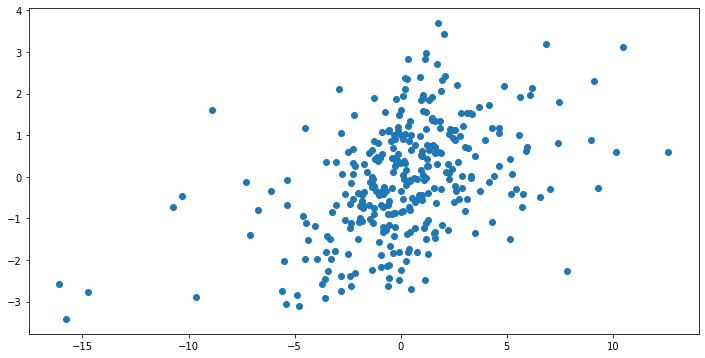

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(y_teste, predict)